For this assignment you will be implementing your own verision of the perceptron algorithm.  Similar to the Naive Bayes assignment your Percptron class should be built to be compatible with the sklearn framework.  You can use the sklearn library and other python libraries to help with your implementation but you must implement the actual percpetron algorithm using your own code.

In [1]:
# import required modules
import pandas as pd
from sklearn import preprocessing
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

#warnings.filterwarnings('default')

** FOR FUTURE REFERENCE: YOU MUST, MUST FOLLOW THE TEMPLATE FOR WHAT NEEDS TO BE IN THE FIT AND PREDICT METHODS AT:

https://scikit-learn.org/stable/developers/develop.html

In [3]:
#TODO: put your perceptron implemenation here

#initial imports that you may find useful
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

class custom_perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, alpha=0.1, epochs=1):
        self.alpha = alpha
        self.epochs = epochs
                 
    def predict(self, X):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        # Check if fit has been called
        check_is_fitted(self)
        
        # Input validation
        X = check_array(X)

        y_hat = np.zeros(len(X))

        for i, row in enumerate(X):                      # Iterate through both X and y together. i is the counter, row is X[i]
            # print(f"predict.enumerate.row: {row}")
            a = sigmoid(np.sum(np.dot(weights,row)))
            # print(f"a: {a} from sigmoid(sum({weights} product {row}))")

            if a >= 0.5:
                # print(f"Class: 1")
                y_hat[i] = 1
            else:
                # print(f"Class: -1")
                y_hat[i] = -1
        
        return y_hat
    
    def train_weights(self, X, y, y_predicted, weights, alpha):
        print(f"Incoming weights: {weights}")
        X_rows, X_columns = X.shape
        weights_update = np.zeros((X_columns))

        for i, row in enumerate(zip(y, y_predicted, X)):
            if row[0] != int(row[1]):
                # Update the weights for each misclassified example
                weights_update += alpha * row[2] * (row[0] - row[1])

        # Apply the accumulated weight updates
        weights += weights_update
        print(f"Outgoing weights: {weights}\n\n")        
        return weights
        
    def fit(self, X, y):

        # STEP 0: Check the parameters
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        self.bias = 0

        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        
        # STEP 1: Initialize the weights of the parameters
        X_rows, X_columns = X.shape
        # print(f"X shape: {X_rows}, {X_columns}")

        # STEP 2: Apply the weights to the Nth instance        
        epoch = 1
        while epoch <= self.epochs:
            # print(f"\n\nEpoch: {epoch}")
            y_hat = np.zeros(len(X))
            y_hat = custom_perceptron.predict(self, X)
            # print(f"len(X): {len(X)} len(y): {len(y)} len(y_hat): {len(y_hat)}")
            # print(f"y_hat: {y_hat}")

            # for i, row in enumerate(zip(y, y_hat)):                    # Iterate through both X and y together. i is the counter, row is X[i]
            global weights
            weights = self.train_weights(X, y, y_hat, weights, self.alpha)
            epoch += 1
        
        return self
            
    def classes_(self):
        if self.estimator:
            return self.estimator.classes_
        

Split the diabetes data into and 80/20 train/test split.


In [4]:
#TODO: split the diabetes data into training/test data

global epoch_range
epoch_range = range(0,50)

df = pd.read_csv('Datasets for Assignment 4/diabetes.csv')
df = df.assign(B=1) # Need to add a bias column to the data set
X = df.drop(columns='class')
y = df['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Ultimately, I have to seed the initial weights entirely outside of the class because they keep getting overwritten as I iterate
global weights
X_rows, X_columns = X_train.shape
weights = np.random.randn(X_columns)


Using the diabetes training data with k-fold cross-validation (you choose the value for k) plot your perceptron's cross-validation accuracy and MCC as a function of the number of training epochs.  Use a learning rate of 0.10.

In [5]:
#TODO: k-fold cross validation with a learning rate of 0.10

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import matthews_corrcoef, accuracy_score

scaled_accuracy_scores = []
scaled_mcc_scores = []
alpha_value = 0.10

# Create a new perceptron instance for each epoch
clf = custom_perceptron(alpha=alpha_value, epochs=1)   # Explicitly setting the number of epochs to 1. The iteration will keep the same instance of the CV splits

# Create the pipeline
pipe = make_pipeline(StandardScaler(), clf) # INTENTIONALLY RUNNING WITH StandardScaler()

# Perform cross-validation using the pipeline
cv = KFold(n_splits=5, shuffle=True, random_state=13)

for i in epoch_range:
    accuracy = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')
    mcc = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='matthews_corrcoef')

    # Append the scores to the respective lists
    scaled_accuracy_scores.append(accuracy.mean())
    scaled_mcc_scores.append(mcc.mean())

non_scaled_accuracy_scores = []
non_scaled_mcc_scores = []

# Create a new perceptron instance for each epoch
clf = custom_perceptron(alpha=alpha_value, epochs=1) # Explicitly setting the number of epochs to 1. The iteration will keep the same instance of the CV splits

# Create the pipeline
pipe = make_pipeline(clf) # INTENTIONALLY RUNNING WITHOUT StandardScaler()

# Perform cross-validation using the pipeline
cv = KFold(n_splits=5, shuffle=True, random_state=13)

for i in epoch_range:

    accuracy = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')
    mcc = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='matthews_corrcoef')

    # Append the scores to the respective lists
    non_scaled_accuracy_scores.append(accuracy.mean())
    non_scaled_mcc_scores.append(mcc.mean())



Incoming weights: [-0.31798701 -0.19264338 -1.73065288 -0.26748102 -0.12404166  1.76843172
  1.33075893  1.28750653 -1.07784088]
Outgoing weights: [  3.71657483  14.96999337  10.20629231   0.79481503   2.72975246
  -4.415333   -13.06988401  -4.44148539  -1.07784088]


Incoming weights: [  3.71657483  14.96999337  10.20629231   0.79481503   2.72975246
  -4.415333   -13.06988401  -4.44148539  -1.07784088]
Outgoing weights: [ 3.25601028 10.79315108 -4.13186616  4.1247317   0.91541344  9.90156203
 12.51932446 -1.14014957 -1.07784088]


Incoming weights: [ 3.25601028 10.79315108 -4.13186616  4.1247317   0.91541344  9.90156203
 12.51932446 -1.14014957 -1.07784088]
Outgoing weights: [  4.766424     8.86907874   0.37151307  -8.58583773 -10.4771781
   0.13355077  -2.86664715   6.29211384  -1.07784088]


Incoming weights: [  4.766424     8.86907874   0.37151307  -8.58583773 -10.4771781
   0.13355077  -2.86664715   6.29211384  -1.07784088]
Outgoing weights: [-4.48300124 19.41575227  4.03476748 24

epoch_range: range(0, 50)


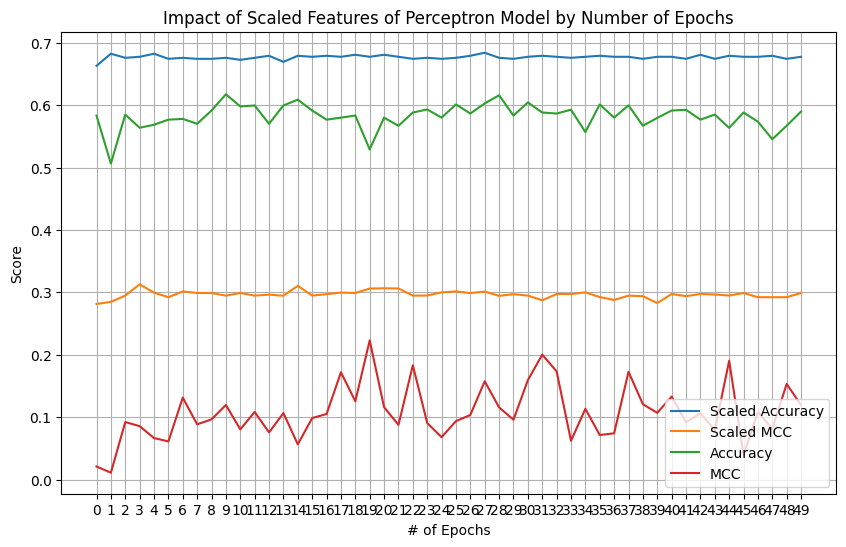

In [6]:
import matplotlib.pyplot as plt

print(f"epoch_range: {epoch_range}")

# Configure the plot
plt.figure(figsize=(10, 6))

# Plot accuracy scores with StandardScaled() Features
plt.plot(epoch_range, scaled_accuracy_scores, label='Scaled Accuracy', )
# Plot MCC scores
plt.plot(epoch_range, scaled_mcc_scores, label='Scaled MCC',)

# Plot accuracy scores
plt.plot(epoch_range, non_scaled_accuracy_scores, label='Accuracy', )
# Plot MCC scores
plt.plot(epoch_range, non_scaled_mcc_scores, label='MCC',)


# Add labels and title
plt.xlabel('# of Epochs')
plt.ylabel('Score')
plt.title('Impact of Scaled Features of Perceptron Model by Number of Epochs')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(epoch_range)
plt.yticks()
plt.show()

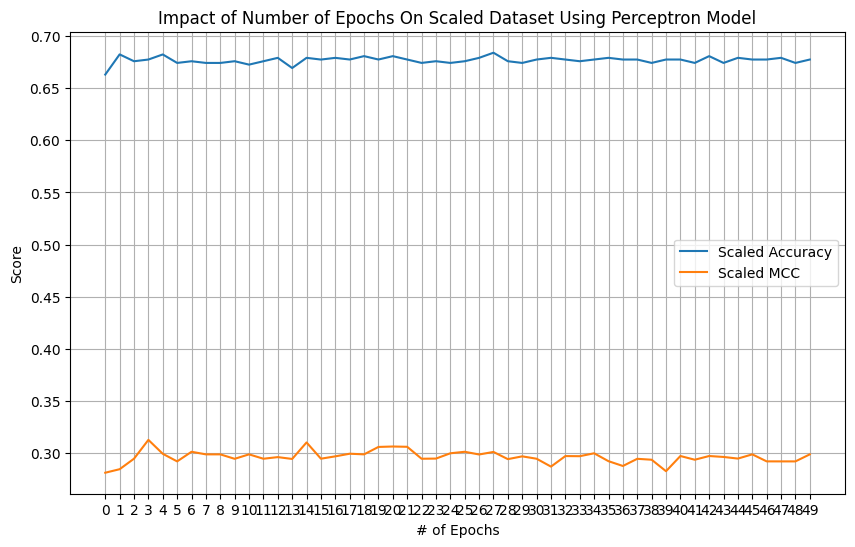

In [7]:
import matplotlib.pyplot as plt

# Configure the plot
plt.figure(figsize=(10, 6))

# Plot accuracy scores with StandardScaled() Features
plt.plot(epoch_range, scaled_accuracy_scores, label='Scaled Accuracy', )
# Plot MCC scores
plt.plot(epoch_range, scaled_mcc_scores, label='Scaled MCC', )

# Add labels and title
plt.xlabel('# of Epochs')
plt.ylabel('Score')
plt.title('Impact of Number of Epochs On Scaled Dataset Using Perceptron Model')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(epoch_range)
plt.yticks()
plt.show()

Choose a normalization/standardization strategy to apply to the diabetes training data. Using k-fold cross validation and plot the cross validation accuracy and MCC as a function of the number of training epochs.  Repeat for learning rates of 0.90, 0.50, 0.10, 0.01, and 0.0001.

In [8]:
#TODO: k-fold cross validation on normalized/standardized data

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import matthews_corrcoef, accuracy_score

learning_rates_range = [0.90, 0.50, 0.10, 0.01, 0.0001]
accuracy_scores = []
mcc_scores = []

# Create a new perceptron instance for each epoch
clf = custom_perceptron(alpha=i, epochs=1)

# Create the pipeline
pipe = make_pipeline(StandardScaler(), clf)

# Perform cross-validation using the pipeline
cv = KFold(n_splits=5, shuffle=True, random_state=13)

for i in learning_rates_range:
    accuracy = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')
    mcc = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='matthews_corrcoef')

    # Append the scores to the respective lists
    accuracy_scores.append(accuracy.mean())
    mcc_scores.append(mcc.mean())


Incoming weights: [ 7542.14536401  5060.24543902 -8446.44528845   961.4085643
   706.85370911  1683.6017867    273.85394749  2468.90204778
 -1774.27784088]
Outgoing weights: [-1833.96003909  5983.37092128 -1565.20737457  2157.30769669
   164.29891519  6058.88153169  1455.99878306 -3527.0392235
 -1774.27784088]


Incoming weights: [-1833.96003909  5983.37092128 -1565.20737457  2157.30769669
   164.29891519  6058.88153169  1455.99878306 -3527.0392235
 -1774.27784088]
Outgoing weights: [ 8557.83958238  5589.06128013   921.96413879 -6463.92265268
 -5737.47490249  1656.25495321 -1301.34192678  8720.71987225
 -1774.27784088]


Incoming weights: [ 8557.83958238  5589.06128013   921.96413879 -6463.92265268
 -5737.47490249  1656.25495321 -1301.34192678  8720.71987225
 -1774.27784088]
Outgoing weights: [-1897.02721668  8629.14080248 -1049.09139212  5161.70529474
  4224.88976196  7583.53766631  3946.51833768 -1325.84749319
 -1774.27784088]


Incoming weights: [-1897.02721668  8629.14080248 -1049.

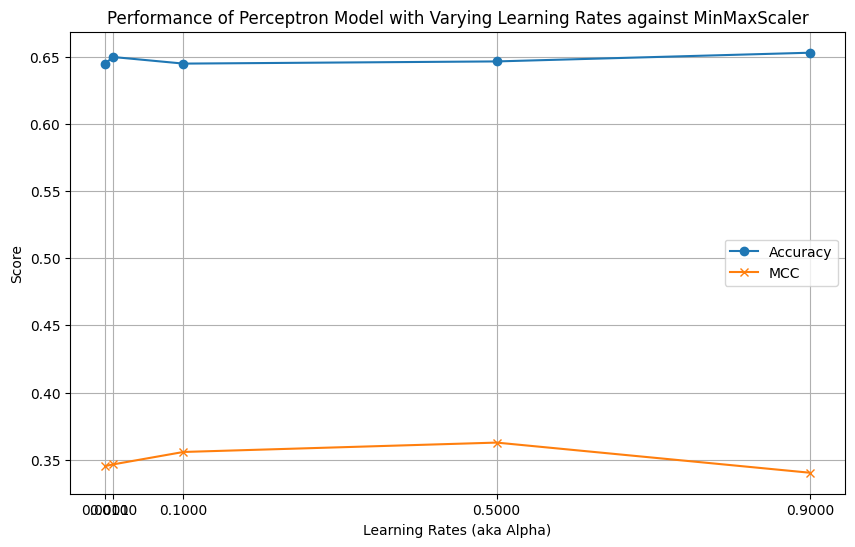

In [9]:
import matplotlib.pyplot as plt

# Configure the plot
plt.figure(figsize=(10, 6))

# Plot accuracy scores
plt.plot(learning_rates_range, accuracy_scores, label='Accuracy', marker='o')

# Plot MCC scores
plt.plot(learning_rates_range, mcc_scores, label='MCC', marker='x')

# Add labels and title
plt.xlabel('Learning Rates (aka Alpha)')
plt.ylabel('Score')
plt.title('Performance of Perceptron Model with Varying Learning Rates against MinMaxScaler')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(learning_rates_range)
plt.yticks()
plt.show()

In [10]:
#TODO: k-fold cross validation on normalized/standardized data

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import matthews_corrcoef, accuracy_score

epoch_range = range(1,10)
learning_rates_range = [0.90, 0.50, 0.10, 0.01, 0.0001]
accuracy_scores = []
mcc_scores = []

clf = custom_perceptron(alpha=i, epochs=1)

# Create the pipeline
pipe = make_pipeline(Normalizer(), clf)

# Perform cross-validation using the pipeline
cv = KFold(n_splits=5, shuffle=True, random_state=13)

for i in learning_rates_range:
    accuracy = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')
    mcc = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='matthews_corrcoef')

    # Append the scores to the respective lists
    accuracy_scores.append(accuracy.mean())
    mcc_scores.append(mcc.mean())


Incoming weights: [ 6929.5880251   5919.79423277 -1088.82475268 -5455.16092991
 -7066.83149828  1748.88257263  -864.64728382  6958.12896544
 -1774.27784088]
Outgoing weights: [ 6929.58694831  5919.7648773  -1088.84400832 -5455.16481524
 -7066.83013363  1748.87433013  -864.64739173  6958.11967156
 -1774.27814051]


Incoming weights: [ 6929.58694831  5919.7648773  -1088.84400832 -5455.16481524
 -7066.83013363  1748.87433013  -864.64739173  6958.11967156
 -1774.27814051]
Outgoing weights: [ 6929.58592144  5919.7370994  -1088.86309422 -5455.16851214
 -7066.82776014  1748.86646087  -864.6474965   6958.11070122
 -1774.2784289 ]


Incoming weights: [ 6929.58592144  5919.7370994  -1088.86309422 -5455.16851214
 -7066.82776014  1748.86646087  -864.6474965   6958.11070122
 -1774.2784289 ]
Outgoing weights: [ 6929.58481536  5919.70785522 -1088.88216588 -5455.17205683
 -7066.82518761  1748.85826746  -864.64759853  6958.10146515
 -1774.27872144]


Incoming weights: [ 6929.58481536  5919.70785522 -10

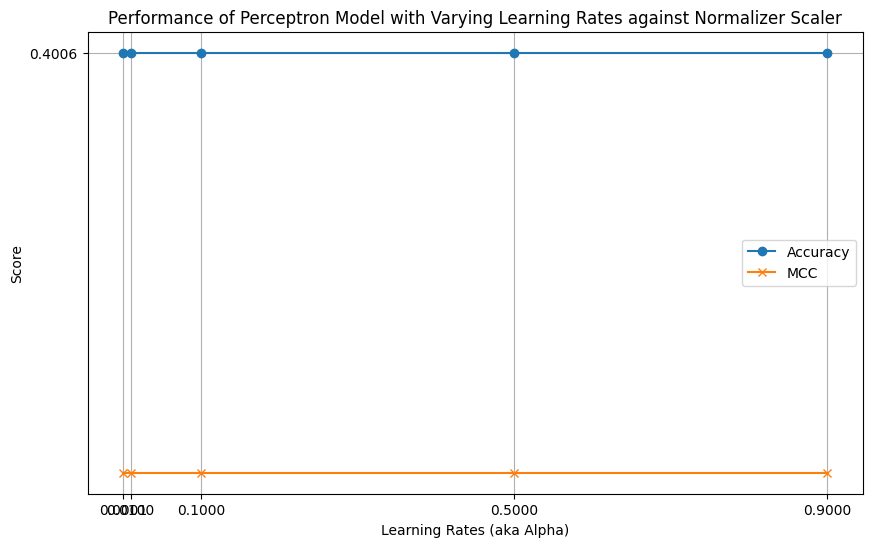

In [11]:
import matplotlib.pyplot as plt

# Configure the plot
plt.figure(figsize=(10, 6))

# Plot accuracy scores
plt.plot(learning_rates_range, accuracy_scores, label='Accuracy', marker='o')

# Plot MCC scores
plt.plot(learning_rates_range, mcc_scores, label='MCC', marker='x')

# Add labels and title
plt.xlabel('Learning Rates (aka Alpha)')
plt.ylabel('Score')
plt.title('Performance of Perceptron Model with Varying Learning Rates against Normalizer Scaler')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(learning_rates_range)
plt.yticks(np.arange(min(accuracy_scores), max(accuracy_scores) + 0.1, step=0.1))
plt.show()

***********************

How does the normalization/standardization affect the accuracy and MCC scores and number of training epochs?

*Normalizing/Scaling the data allows the gradient desent to function much more effectively because the data is much more clustered around zero. In addition, scaling/normalizing the data requires fewer training epochs are required for the data before the model begins to approach a limit (flat line) in terms of accuracy and MCC scores.*

*In the chart titled, 'Impact of Scaled Features of Perceptron Model by Number of Epochs', you can see how much better the accuracy (green vs blue) and MCC (red vs orange) are after scaling the features as part of the pipeline.*

![ImpactofScaledFeaturesbyNumberofEpochs.png](ImpactofScaledFeaturesbyNumberofEpochs.png)

On the scaled data, for each learning rate, how many training epochs are needed to acheive maximize the accuracy and MCC scores?

*Training with 100 epochs seems to be the sweet spot. What little improvement when moving from 100 epochs to 500 epochs will likely result is greater overfitting to the training set. This is illustrated in the chart titled 'Impact of Number of Epochs On Scaled Dataset Using Perceptron Model'*



![VariedLearningRates.png](VariedLearningRates.png)

Is there a correlation between learning rates and the number of training epochs needed to acheive the optimal results?  If so, what is the correlation?  If not, why not?

*Yes, there is a correlation between learning rates and the number of training epochs required to active optimal results. Higher learning rates converge faster, but then oscillate (bounce around) the local maxima/minima while lower learning rates will generally find the local maxima albeit slowly. For best results, one can use a learning rate schedule to start the learning process with a high learning rate and then decrease it as the trained model matures. These can include time-based decay, step decay, and exponential decay.*

Article I read to understand this process more: https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1


Helpful resources:
* https://towardsdatascience.com/how-to-build-a-custom-estimator-for-scikit-learn-fddc0cb9e16e
* Trying to handle the scoring error: https://ubc-cs.github.io/cpsc330-2023W1/lectures/class_demos/05-06_class-demo.html